In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4 MB 5.8 kB/s  eta 0:00:01     |████████████████▋               | 391.8 MB 50.7 MB/s eta 0:00:08     |███████████████████▊            | 463.6 MB 45.5 MB/s eta 0:00:07��█▉            | 467.4 MB 45.5 MB/s eta 0:00:07     |████████████████████            | 470.8 MB 45.5 MB/s eta 0:00:07     |████████████████████            | 471.8 MB 45.5 MB/s eta 0:00:07     |████████████████████▏           | 473.7 MB 45.5 MB/s eta 0:00:07     |████████████████████▏           | 474.5 MB 45.5 MB/s eta 0:00:07     |████████████████████████████    | 656.9 MB 54.2 MB/s eta 0:00:02     |████████████████████████████▌   | 670.2 MB 48.3 MB/s eta 0:00:02ta 0:00:02��███████████▎| 735.3 MB 43.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 44 kB/s  eta 0:00:01     |█████████████▌                  | 1.7 MB 2.8 MB/s eta 0:00:01     |███████████████████             | 2.4 MB 2.8 MB/s eta 0:00:01     |█████████████████████████████▉  | 3.8 MB 2.8 MB/s eta 0:00

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

### Importing Data

In [4]:
path = Path("../input/10-monkey-species")
path

PosixPath('../input/10-monkey-species')

In [5]:
path.ls()

[PosixPath('../input/10-monkey-species/validation'),
 PosixPath('../input/10-monkey-species/monkey_labels.txt'),
 PosixPath('../input/10-monkey-species/training')]

In [6]:
(path/'training/training').ls()

[PosixPath('../input/10-monkey-species/training/training/n4'),
 PosixPath('../input/10-monkey-species/training/training/n8'),
 PosixPath('../input/10-monkey-species/training/training/n7'),
 PosixPath('../input/10-monkey-species/training/training/n3'),
 PosixPath('../input/10-monkey-species/training/training/n9'),
 PosixPath('../input/10-monkey-species/training/training/n1'),
 PosixPath('../input/10-monkey-species/training/training/n5'),
 PosixPath('../input/10-monkey-species/training/training/n0'),
 PosixPath('../input/10-monkey-species/training/training/n6'),
 PosixPath('../input/10-monkey-species/training/training/n2')]

### Loading the Data

In [7]:
data = ImageDataBunch.from_folder(path, train='training', valid='validation', ds_tfms=get_transforms(), bs = bs , size=224).normalize(imagenet_stats)

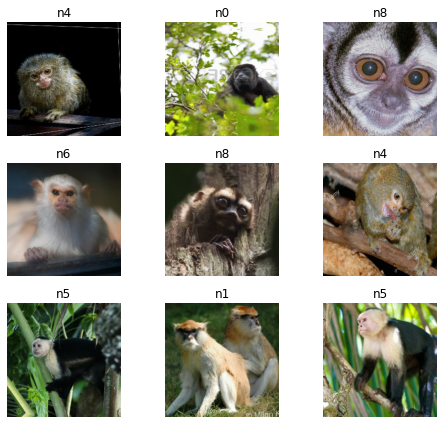

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
print(data.classes)
len(data.classes),data.c

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


(10, 10)

### Training the Model

We will be training the model using CNN on resnet34

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy]);learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.704483,0.041836,0.018382,0.981618,01:43
1,0.792720,0.031061,0.011029,0.988971,01:42
2,0.473857,0.022085,0.011029,0.988971,01:40
3,0.311466,0.022837,0.014706,0.985294,01:36


### Wow 98.5% accuracy Not bad! [](http://)

In [12]:
learn.model_dir = "/kaggle/working" # Changing learn model_dir to /kaggle/working
learn.save('stage-1')

### Results

Let's see our results. We'll first see what catoegories was the model mot confused with and we'll also plot the confusion matrix.

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

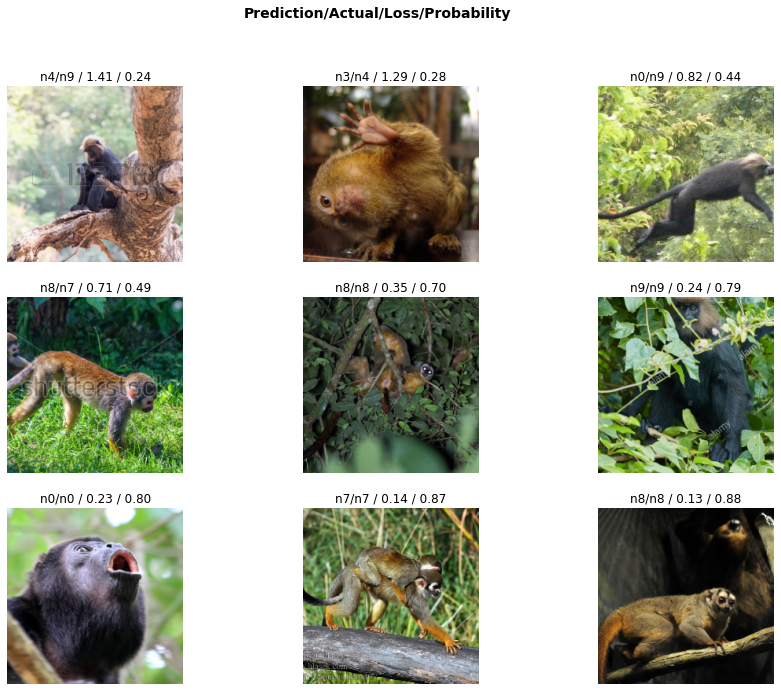

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

As you can see that the model is nearly 100% accurate. Let's plot the confusion matrix

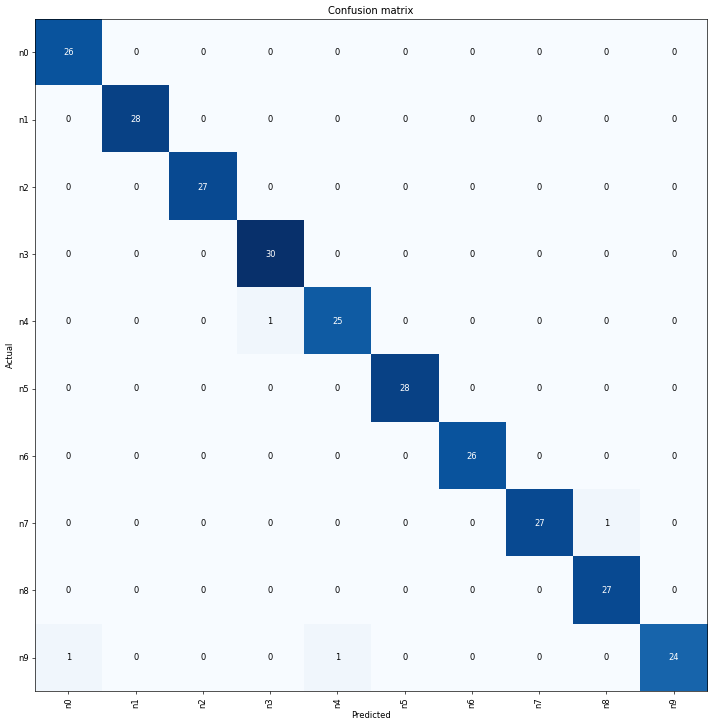

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
interp.most_confused(min_val=2)

[]

The confusion matrix traced a diagonal, meaning the model correctly recognized most of the characters, even those of the least popular ones (unbalanced classes), with only 20–40 images. This was made possible thanks to a technique called transfer learning.

Also if you see 
```interp.most_confused``` is 0 since we specified min val as 2. That means that if there is any confusion between 2 species, the confusion is not more than once between those species. This is amazing!!!

Since our model is working as we expect it to, we will unfreeze our model and train some more.

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.128075,0.227839,0.066176,0.933824,01:39


Loading Stage 1 again and finding the learning rate

In [19]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1097 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n4,n4,n4,n4,n4
Path: ../input/10-monkey-species;

Valid: LabelList (272 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
n4,n4,n4,n4,n4
Path: ../input/10-monkey-species;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [ ]:
learn.lr_find()

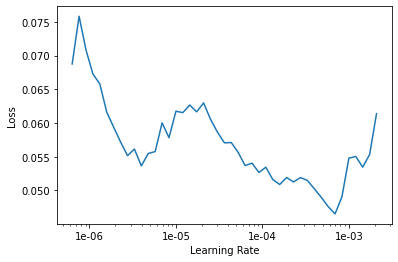

In [21]:
learn.recorder.plot()

In [22]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.091837,0.212692,0.051471,0.948529,01:39
1,0.152728,0.071151,0.033088,0.966912,01:37


In [24]:
learn.save('stage-2')

Pretty accurate model with ~ 97% accuracy